# Data Description

# Importing Libraries

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Importing the Data

In [2]:
# import the data
df = pd.read_csv('CensusIncomeProject.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# description of the datset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
# check for missing data (np.nan/blank)
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

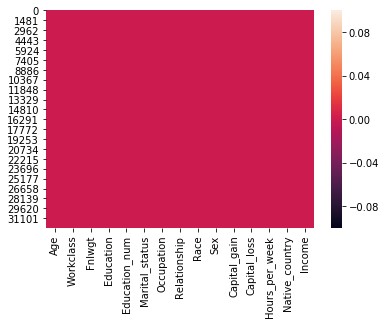

In [8]:
sns.heatmap(df.isna())

We see that there are no null values in Dataset

In [9]:
# There are some missing values in the datset which are represented by '?'
# Let's convert them to NaNs
df[df == ' ?'] = np.nan

In [10]:
# total number of values missing from each of the columns in the datframe
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

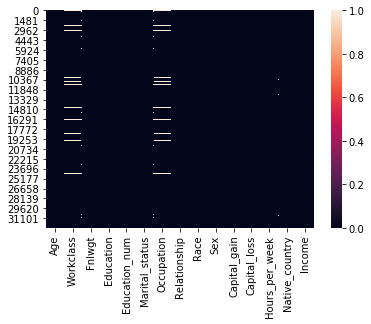

In [11]:
# heatmap of all the missing data
sns.heatmap(df.isna())

We see that there are missing values in the dataset

In [12]:
# percentage of data missing from each column of the dataframe
df.isna().mean()

Age               0.000000
Workclass         0.056388
Fnlwgt            0.000000
Education         0.000000
Education_num     0.000000
Marital_status    0.000000
Occupation        0.056603
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.000000
Native_country    0.017905
Income            0.000000
dtype: float64

#### Inference
* All the colums with missing data(?) have missing data less than 5.7% of the total vaules in the column
* capital-gain and capital-loss are the two columns to look forward to.
* The dataset contains nominal(such as marital-status),ordinal(such as education),binary(gender),continous as well as discrete featrues
* Take a look at the target variable:
 * --> it has 2 classes:
    * 1: >50K
    * 2: <=50K
    * We need to it convert it into machine learning compatible values


# EDA

### Univariate Analysis

#### Age

In [13]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

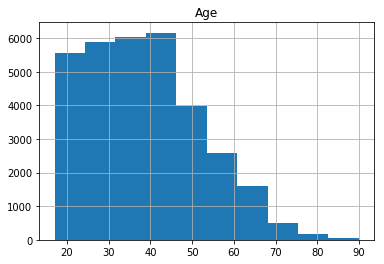

In [14]:
df["Age"].hist(grid=True)
plt.title("Age")
plt.show()

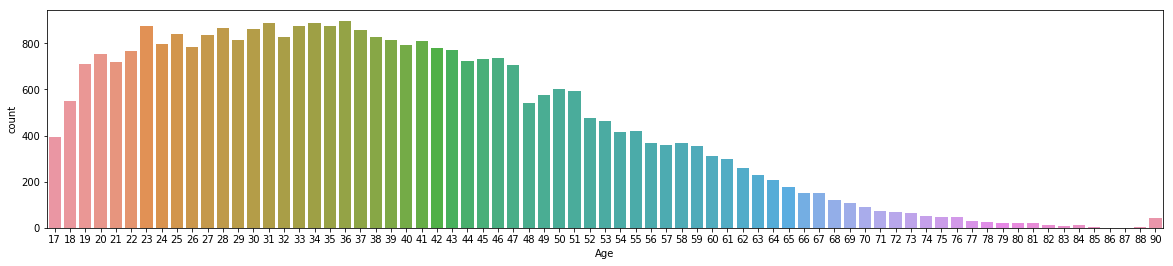

In [15]:
plt.figure(figsize=(20,4))
sns.countplot(df.Age)

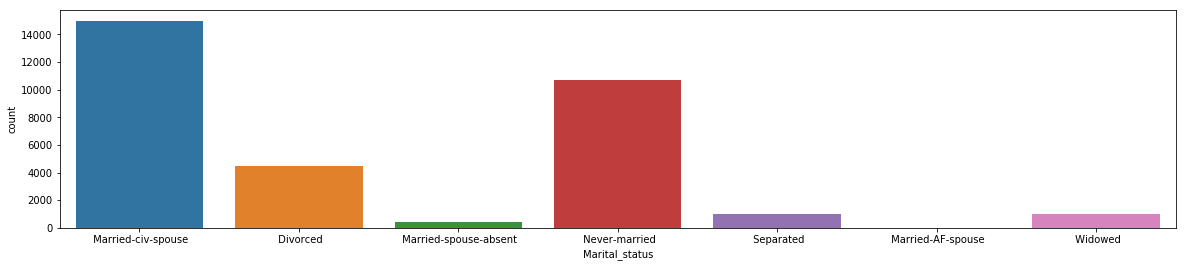

In [16]:
plt.figure(figsize=(20,4))
sns.countplot(df.Marital_status)

Married CiV Spouse are more in the dataset

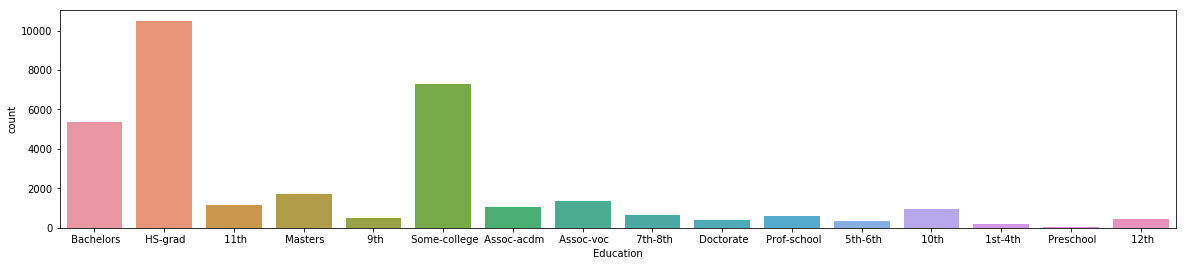

In [17]:
plt.figure(figsize=(20,4))
sns.countplot(df.Education)

HS Grad are more in the dataset

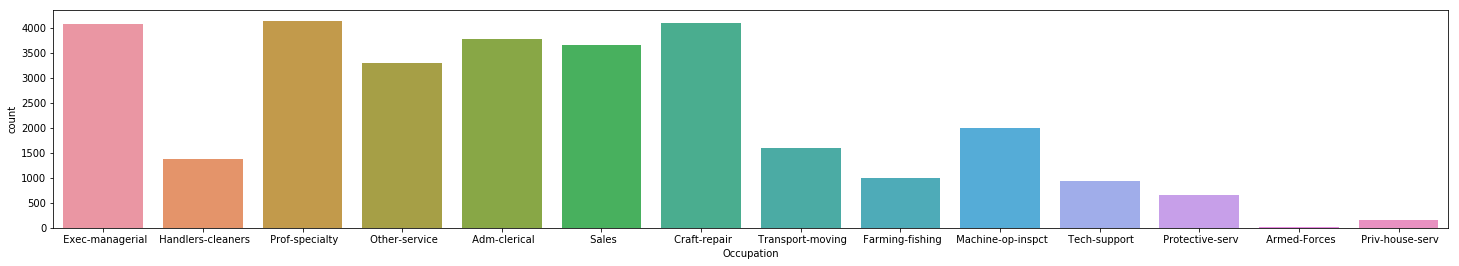

In [18]:
plt.figure(figsize=(25,4))
sns.countplot(df.Occupation)

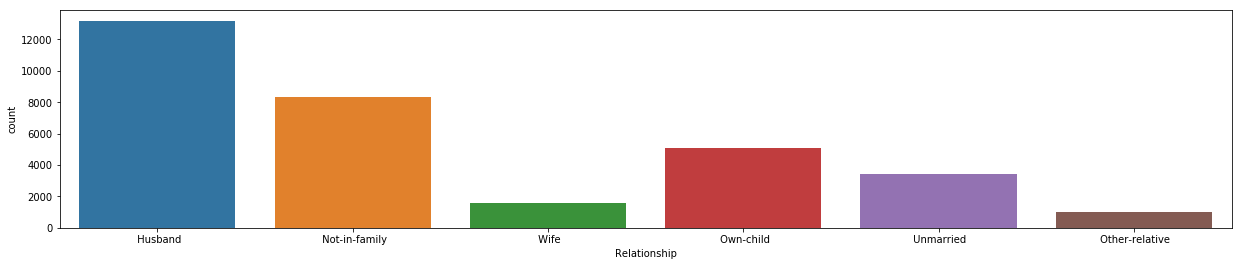

In [19]:
plt.figure(figsize=(21,4))
sns.countplot(df.Relationship)

Husbands are more in the dataset

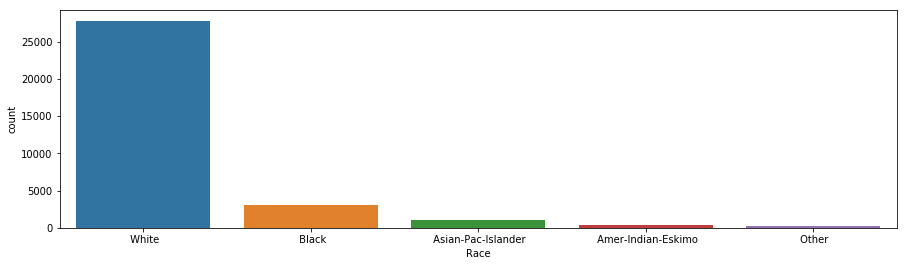

In [20]:
plt.figure(figsize=(15,4))
sns.countplot(df.Race)

White are more in the dataset

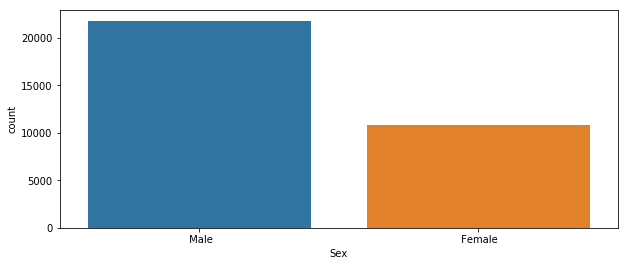

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(df.Sex)

Male are more in Dataset

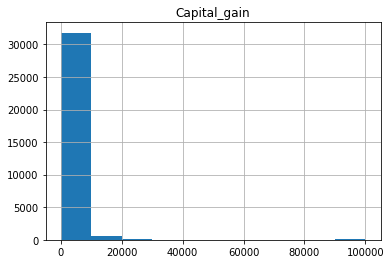

In [22]:
df["Capital_gain"].hist(grid=True)
plt.title("Capital_gain")
plt.show()

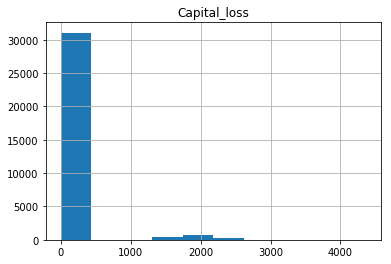

In [23]:
df["Capital_loss"].hist(grid=True)
plt.title("Capital_loss")
plt.show()

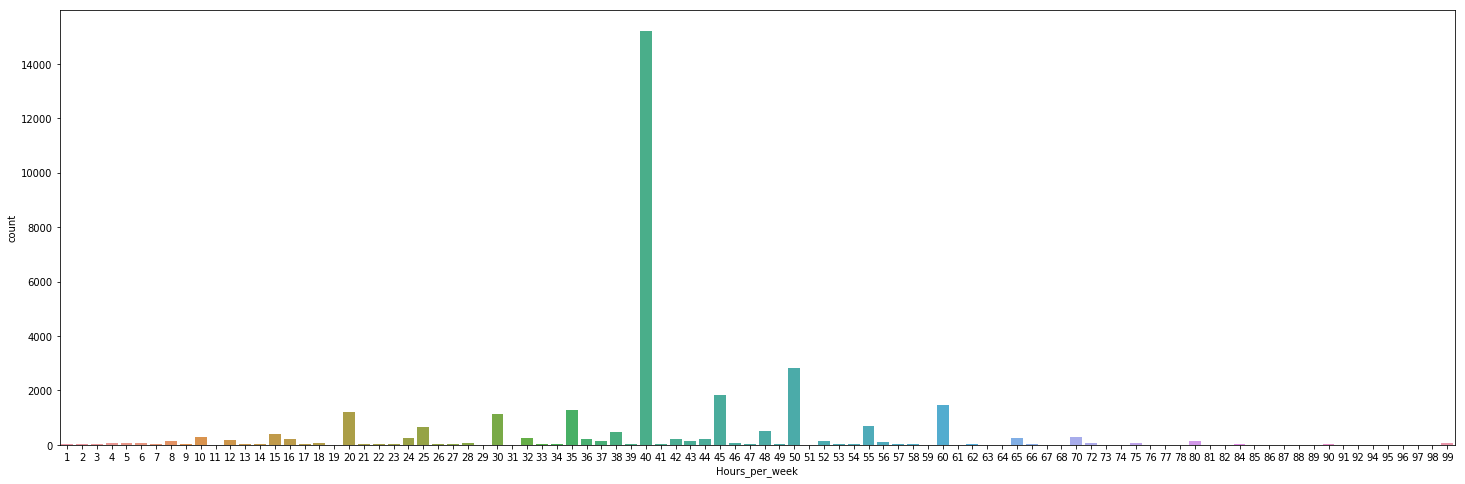

In [24]:
plt.figure(figsize=(25,8))
sns.countplot(df.Hours_per_week)

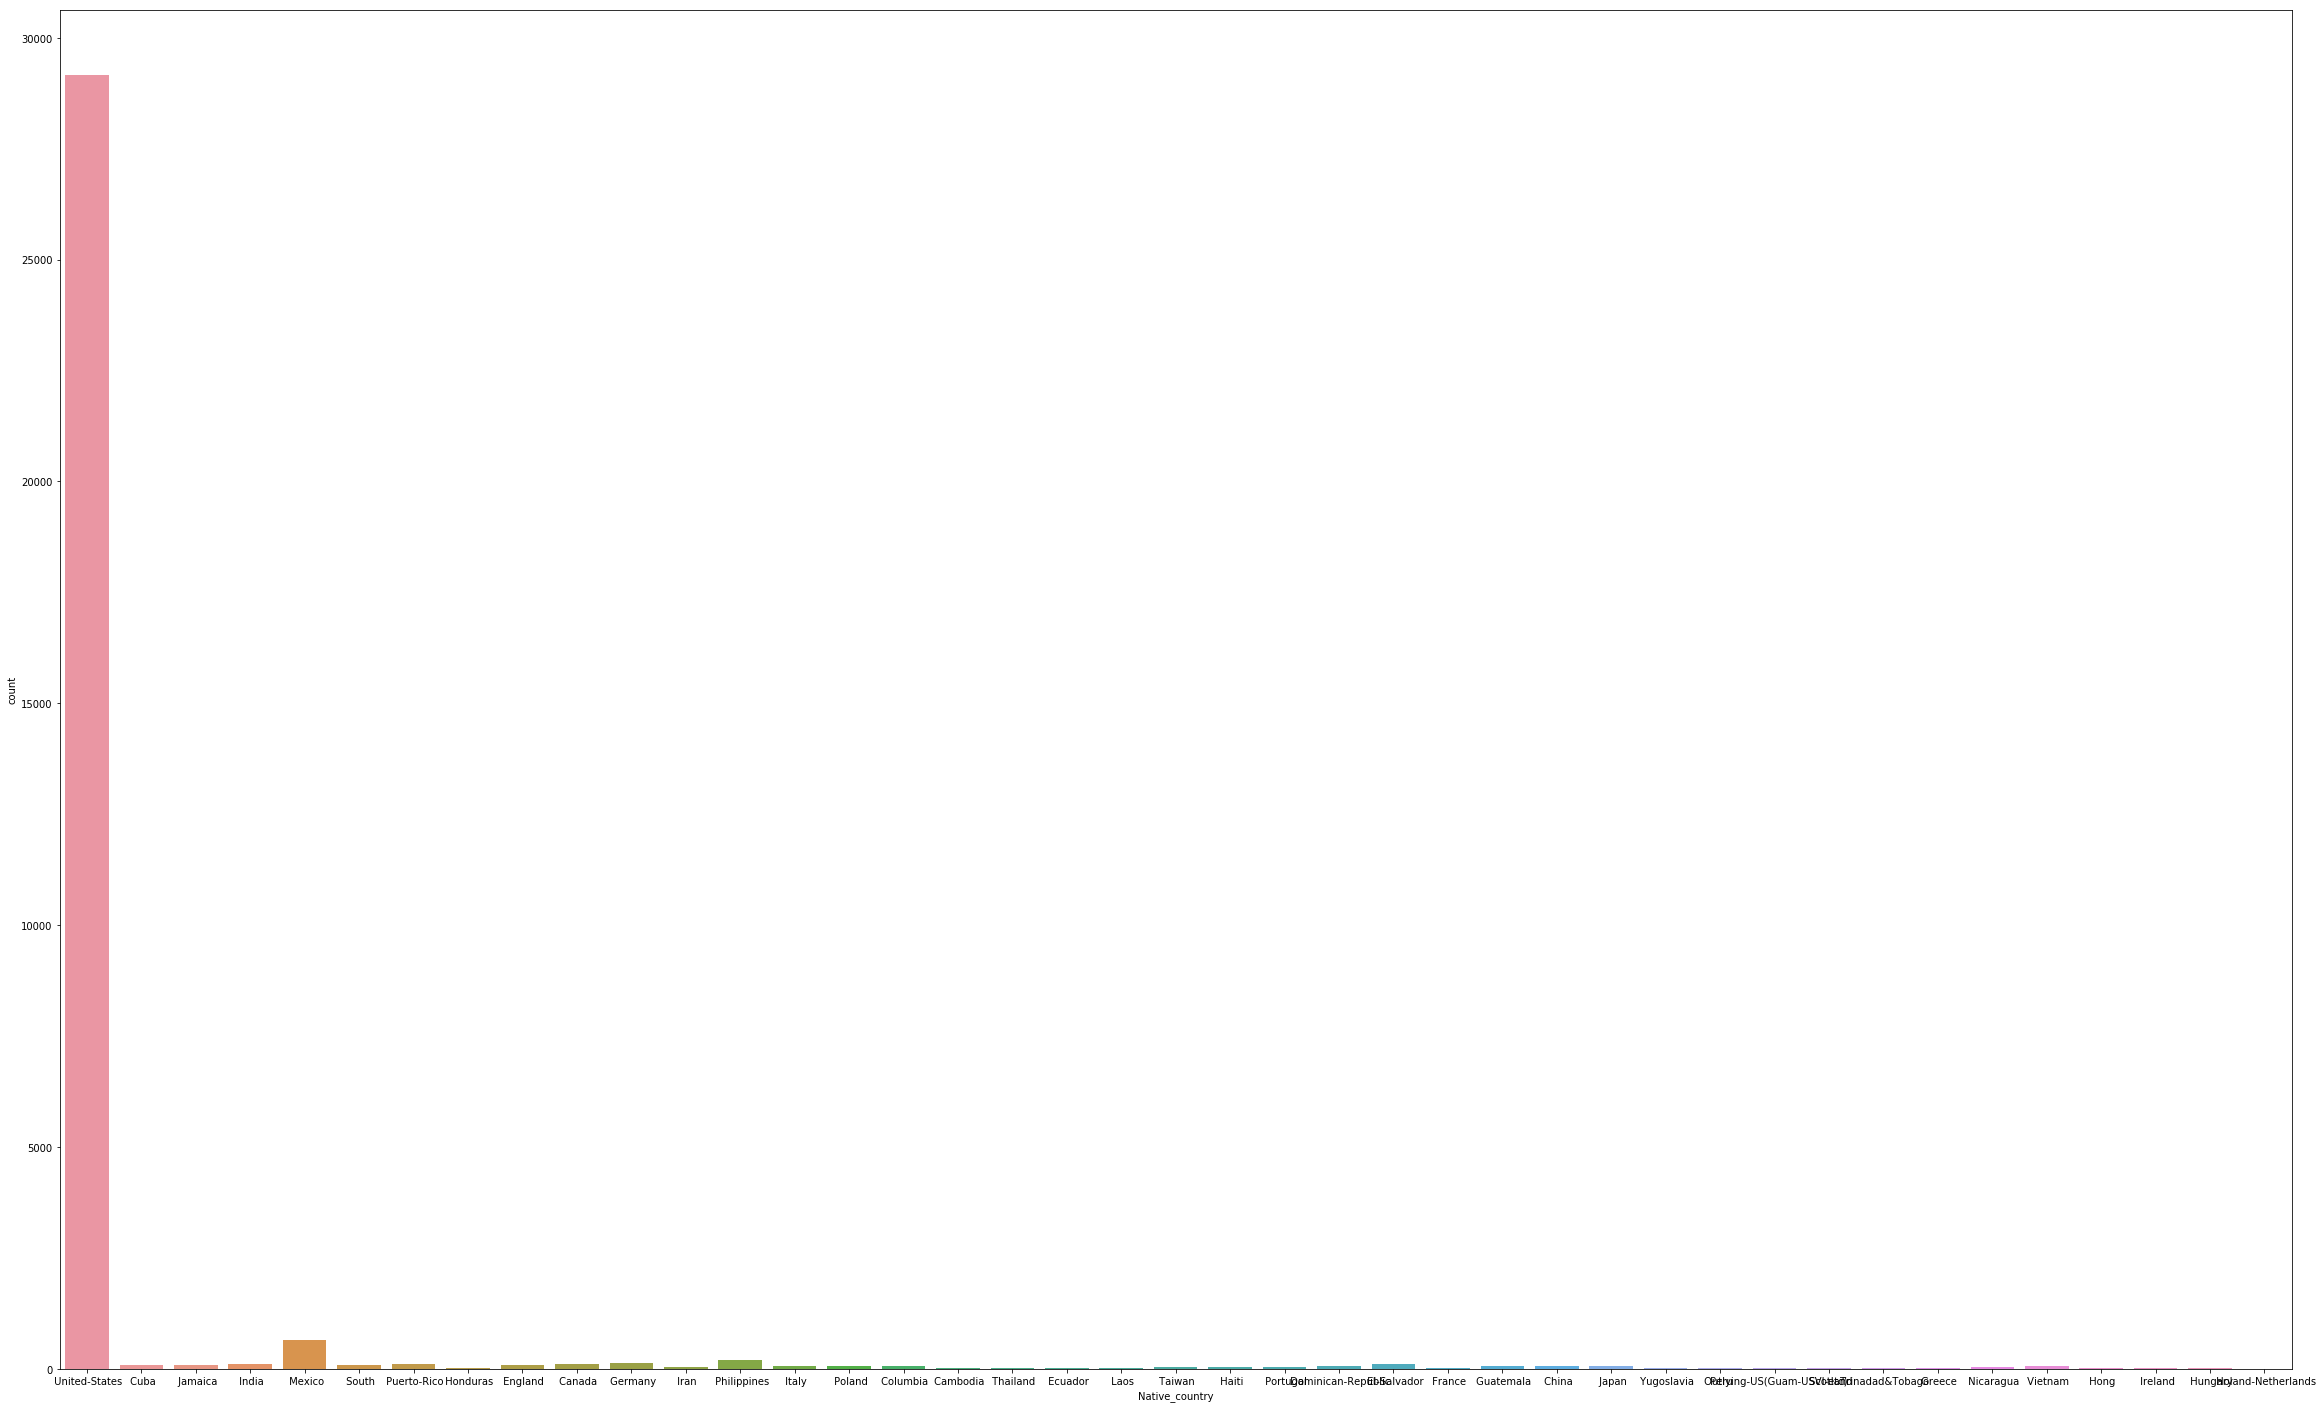

In [25]:
plt.figure(figsize=(40,25))
sns.countplot(df.Native_country)

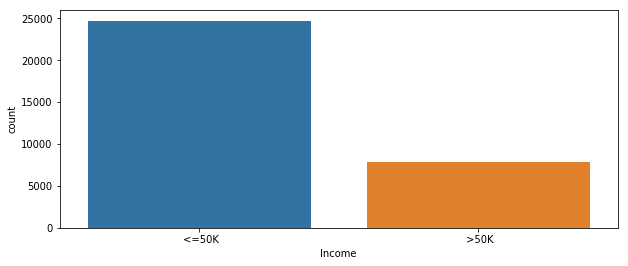

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(df.Income)

In [ ]:
We see that more people earn <=50k

# BiVariate Analysis

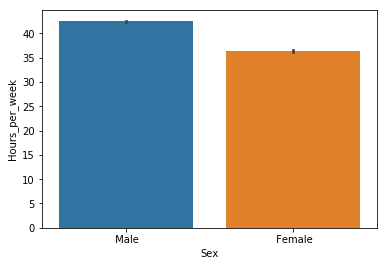

In [27]:
sns.barplot(df.Sex,df['Hours_per_week'])

We see that Male works more Hours a week

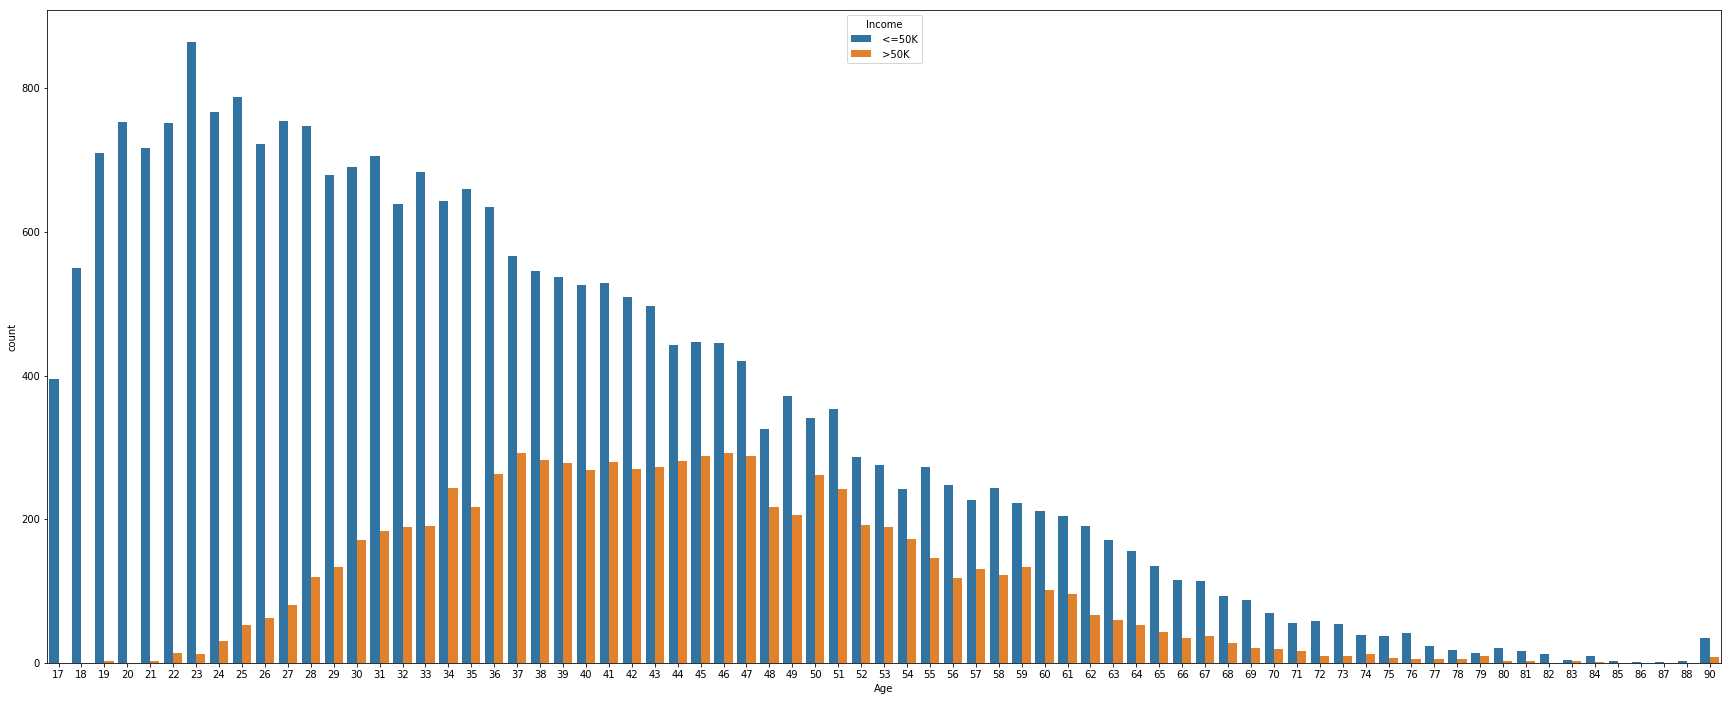

In [28]:
plt.figure(figsize=(30,12))
sns.countplot(df['Age'],hue=df.Income)

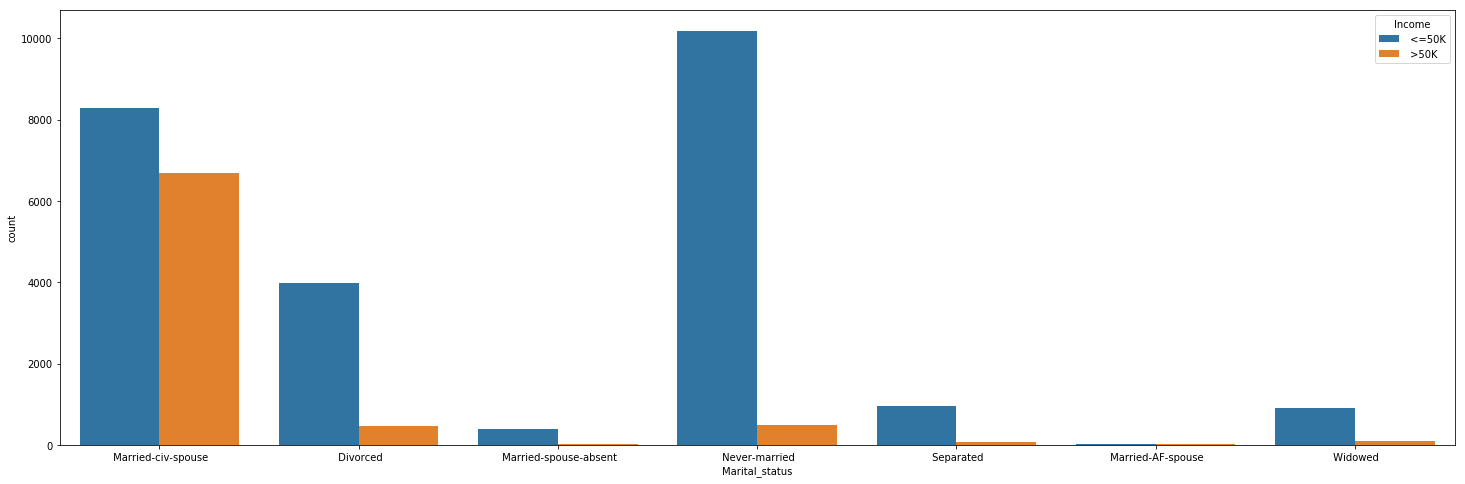

In [29]:
plt.figure(figsize=(25,8))
sns.countplot(df['Marital_status'],hue=df.Income)

More Married Spouse earns above 50k while majority of Never Married earn less than 50k

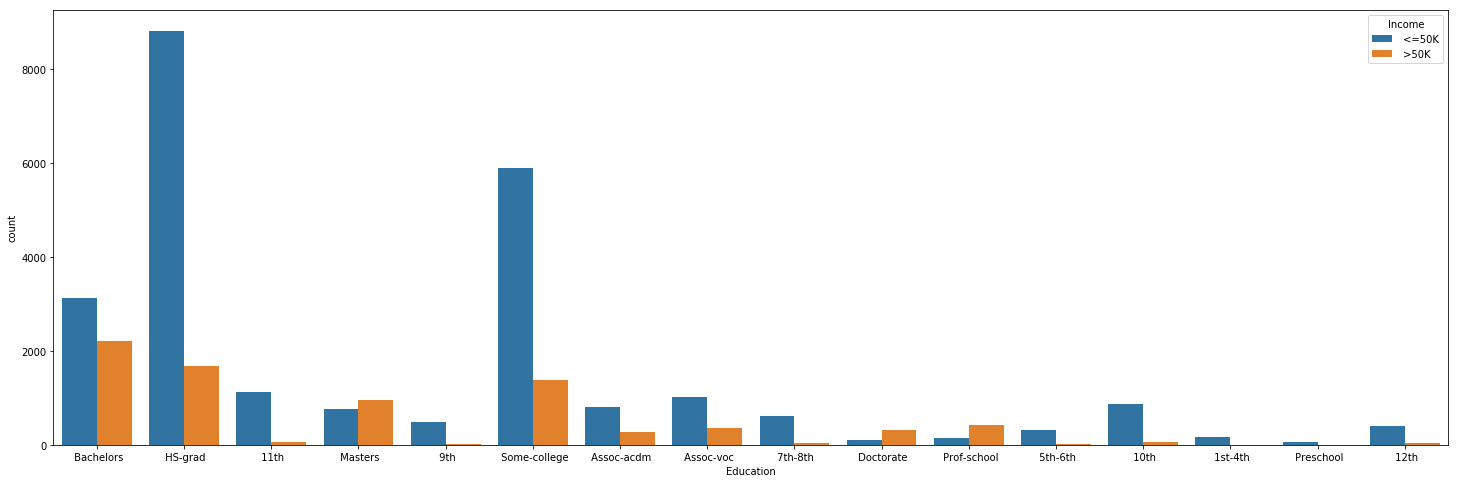

In [30]:
plt.figure(figsize=(25,8))
sns.countplot(df['Education'],hue=df.Income)

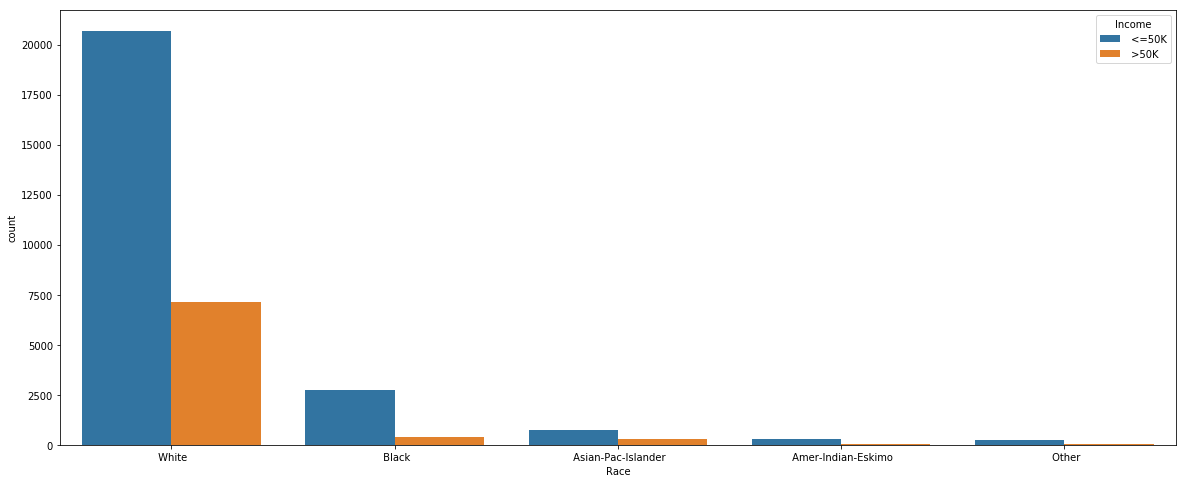

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(df['Race'],hue=df.Income)

We see that more White people earn less than 50k and while earning people more than 50k are also white 

# We need to encode the data

In [32]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [33]:
# As all these values are in String type, therefore we have to convert them to numeric data type, so we will use Label Encoder
cols=['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country','Income']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols: 
    df[i]=le.fit_transform(df[i]) 
    

In [34]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,Bachelors,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,HS-grad,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,11th,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,Masters,14,2,3,5,4,0,0,0,40,38,0


In [35]:
#We Don't require Fnlwgt,Education to predict the income
df1=df.drop(["Fnlwgt","Education"],axis=1)    

In [36]:
df1.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0


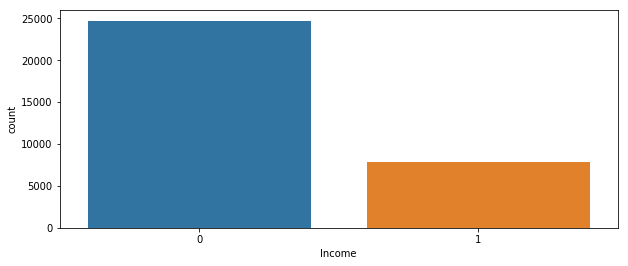

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(df1.Income)

# Outlier Removal

In [38]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape

(32560, 13)

In [39]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([11, 10,  6, ...,  6,  6,  6], dtype=int64))


In [40]:
df1_new=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df1_new.shape)

(32560, 13)
(28094, 13)


### Percentage Data Loss

In [41]:
loss_percent=((32560-28094)/32560)*100
loss_percent

13.716216216216214

As Loss is above 7% therefore we will not consider removal of Outliers

As Majority of the column have categorical data, therefore Removal of Skewness is not required

## Splitting Of Data

In [42]:
# splitting x and y
x=df1.drop("Income",axis=1)
y=df1["Income"]

# Finding Best Random State

In [43]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.8180282555282555 on Random_State 22


As Random State obtained is 22, therefore we will Split and Train the Model using Random_State=22

# Train and Test Split


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=22)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [46]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression()
0.8180282555282555
[[4691  269]
 [ 916  636]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4960
           1       0.70      0.41      0.52      1552

    accuracy                           0.82      6512
   macro avg       0.77      0.68      0.70      6512
weighted avg       0.80      0.82      0.80      6512

Cross Validation Score: 0.8071560196560196
Difference Between Accuracy Score and CrossValidation Score: 0.010872235872235958


Accuracy score: of SVC()
0.8065110565110565
[[4811  149]
 [1111  441]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4960
           1       0.75      0.28      0.41      1552

    accuracy                           0.81      6512
   macro avg       0.78      0.63      0.65      6512
weighted avg       0.80      0.81      0.77      6512

Cross Validation Score: 0.8023341523341523
Difference Between 

We see that knn model is giving us minimum difference between Accuracy Score and Cross_Validation_Score

# Hyper Parameter Tuning

In [47]:
import joblib 

In [48]:
joblib.dump(knn,'Census_Income_Project.obj')

['Census_Income_Project.obj']